In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import regionmask
import regionmask.defined_regions as rm
import us_state_abbrev
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import geopandas as gp

from cartopy.io import shapereader

## Step 0: Load state masks from [regionmask](https://regionmask.readthedocs.io/en/stable/) package

In [3]:
provinces = regionmask.defined_regions.natural_earth.states_provinces_10
province_names = ['None' if province is None else province for province in provinces.names]

In [25]:
[province for province in province_names if ('Gyeongsang' in province)]

['South Gyeongsang', 'North Gyeongsang']

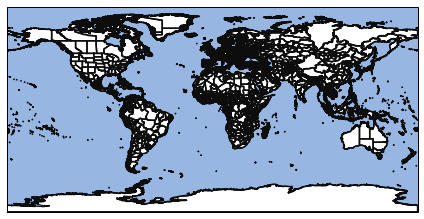

In [26]:
provinces.plot(add_label=False);
plt.tight_layout()

## Step 1: Province-level average environmental conditions

In [27]:
ds = xr.open_dataset('../data/daily_spec_humidity_2020.nc')

In [28]:
provinces_mask = provinces.mask(ds['longitude'], ds['latitude'], wrap_lon=True)
provinces_ma = np.ma.masked_invalid(provinces_mask)


In [36]:
import cartopy

(32.0, 42.0)

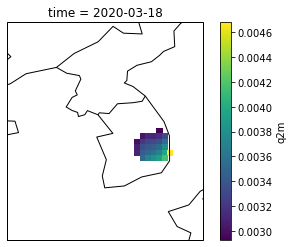

In [46]:
province = 'North Gyeongsang'
ax = plt.axes(projection=cartopy.crs.PlateCarree())
(ds['q2m'].where(provinces_ma == provinces[province].number)).isel(time=-1).plot(ax = ax)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.add_feature(cartopy.feature.COASTLINE)
plt.xlim([122, 131])
plt.ylim([32,42])

Text(0.5, 1.0, 'Average specific humidity in North Gyeongsang in 2020')

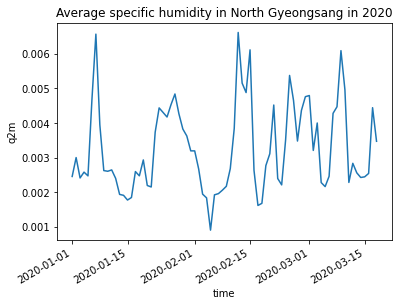

In [42]:
(ds['q2m'].where(provinces_ma == provinces[province].number)).mean(dim=['latitude', 'longitude']).plot()
plt.title(f"Average specific humidity in {province} in 2020")

## Step 2: Province-level epidemiological data

The JHU dataset doesn't have province-level edipemiological data, so we need any source of data for this (at least in the outdated version I am looking at here).

In [48]:
from utils import *
df = load_jhu_df()
pdf = df[df['Country/Region'] == 'South Korea']
pdf.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
37,NaN,South Korea,1/24/20 17:00,2.0,NaN,NaN,01-24-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,South Korea,2020-02-21T13:43:02,204.0,2.0,16.0,02-21-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,South Korea,2020-02-25T08:13:19,977.0,10.0,22.0,02-25-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
703,NaN,South Korea,2020-02-23T23:33:07,602.0,6.0,18.0,02-23-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,NaN,South Korea,2020-02-11T02:53:02,28.0,0.0,3.0,02-11-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
pdf[pdf['Province/State'] == province]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
